In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

### Gaussian Blur

In [2]:
class GaussianBlur():
    def __init__(self, kernel_size, sigma_min=0.1, sigma_max=2.0):
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max
        self.kernel_size = kernel_size

    def __call__(self, img):
        sigma = np.random.uniform(self.sigma_min, self.sigma_max)
        img = cv2.GaussianBlur(np.array(img), (self.kernel_size, self.kernel_size), sigma)
        return Image.fromarray(img.astype(np.uint8))

### Implement a dataloader that applies random gaussian blur. (Using MNIST Dataset)

In [3]:
# Extract and Transform
train_set = torchvision.datasets.MNIST(
    root=r'./Dataset',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.RandomApply([GaussianBlur(kernel_size=7)], p=0.5), # 50% random gaussian blur 
        transforms.ToTensor()
    ])
)

# DataLoader
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 100,
    shuffle = True  # to have the data reshuffled at every epoch
)

In [4]:
batch = next(iter(train_loader))
images, labels = batch
print(images.shape,'\t',labels.shape)

torch.Size([100, 1, 28, 28]) 	 torch.Size([100])


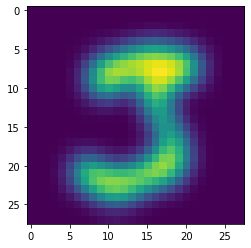

In [10]:
plt.imshow(transforms.ToPILImage()(images[0]))
plt.savefig("./Result1.png")

In [6]:
grid = torchvision.utils.make_grid(images, nrow=10) # nrow：Number of images per row

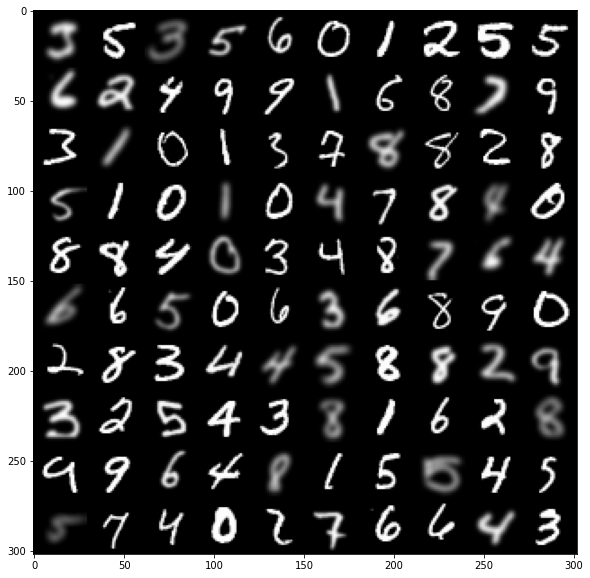

In [11]:
plt.figure(figsize=(10,10)) # figure size
plt.imshow(np.transpose(grid, (1,2,0)))
plt.savefig("./Result2.png")